# day 132 and day 134 and day 135

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# SOME KEY TERMS

# Batch Size:

* Batch size is the sample size each time the algorithm looks at the data how many samples are picked. i.e total number of images is 10000 and the default batch size is 32 then we look at 32 images per epoch.


# Epoch:

* Epoch is each iteration or time.

# Batch Size and Epoch:

* if there are 10000 images and our batch size is 32 and epoch is 100 times then, our algorithm references 32 images per epoch for 100 epochs.



# cross entropy:

# $$ \sum_{i=1}^{n} - \text{observed}_i * \log(\text{predicted}_i) $$

# Few types of classification:

* Binary Classification.

* MulitClass Classification.


* MultiLabel Classification.

# rehearsal:playing with sample toy dataset

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000
x,y = make_circles(n_samples,noise=0.03,random_state=42)


# creating a dataframe for x and y

df = pd.DataFrame({'x0':x[:,0], 'x1':x[:,1], 'y':y  })



# explanation, analysis and freethrows:



In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
np.shape(x)

(1000, 2)

In [ ]:
np.shape(y)

(1000,)

In [ ]:
# viewing the dataframe
df

x0        x1  y
0    0.754246  0.231481  1
1   -0.756159  0.153259  1
2   -0.815392  0.173282  1
3   -0.393731  0.692883  1
4    0.442208 -0.896723  0
..        ...       ... ..
995  0.244054  0.944125  0
996 -0.978655 -0.272373  0
997 -0.136900 -0.810012  1
998  0.670362 -0.767502  0
999  0.281057  0.963824  0

[1000 rows x 3 columns]

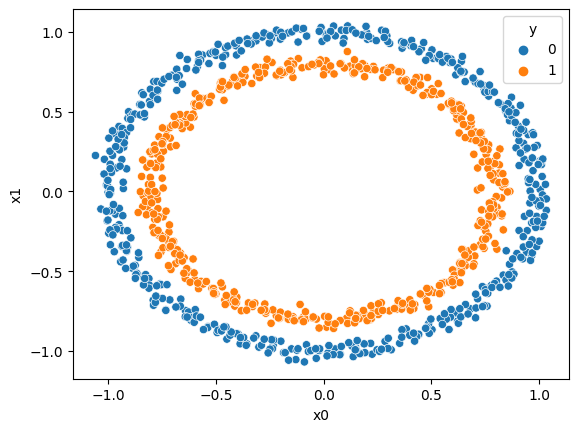

In [ ]:
# visualize the data frame

sns.scatterplot(data=df,x='x0',y='x1',hue='y')
plt.show()

# train test split

In [ ]:
x = df.drop('y',axis=1)
y = df['y']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train

x0        x1
29   0.657946 -0.465081
535  0.631949 -0.734663
695 -1.008616 -0.124031
557 -0.966575 -0.225622
836 -0.166590  0.799446
..        ...       ...
106  0.612205  0.509429
270  0.988187 -0.156382
860  0.015745 -1.029985
435  1.011026  0.168028
102  0.557782 -0.570876

[800 rows x 2 columns]

In [ ]:
x_train.shape

(800, 2)

In [ ]:
x_test.shape

(200, 2)

# building neural networks

In [ ]:
# build the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))


# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.Accuracy())


# fit the model
model.fit(x_train,y_train,epochs=200,verbose=False)

# evaluate the model
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.0000e+00


[0.6945397853851318, 0.0]

In [ ]:
np.mean(y_train)

0.5

In [ ]:
tf.__version__

'2.12.0'

# accuracy of our model is just 0% we want to improve it.


# improvements:
1. Add an extra neural layer!


In [ ]:
# set random_seed
tf.random.set_seed(42)

# build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))

# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.Accuracy())
# fit the model
model.fit(x_train,y_train,epochs=100,verbose=False)

# evaluate the model
model.evaluate(x_test,y_test)


# conclusion:
# still the same result

7/7 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.0000e+00


[7.712474346160889, 0.0]

# improving the model

1. use activation='softmax'
2. use more hidden units_100 units,10 units and 1 unit as output.
3. add an extra neural layer.
4. for the neural layer with 10 hidden units use activation='relu'
5. for the neural layer with 1 hidden unit use activation='softmax'
6. use Adam instead of SGD() as optimizer.

In [ ]:
# setting the random seed
tf.random.set_seed(42)


# build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,name='input_layer'))
model.add(tf.keras.layers.Dense(10,activation='relu',name='hidden_layer'))
model.add(tf.keras.layers.Dense(1,activation='softmax',name='output_layer'))

# compiling the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['Accuracy'])


# fit the model
history = model.fit(x_train,y_train,epochs=100,verbose=False)

# evaluate the model
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0979 - Accuracy: 0.5000


[0.09791717678308487, 0.5]

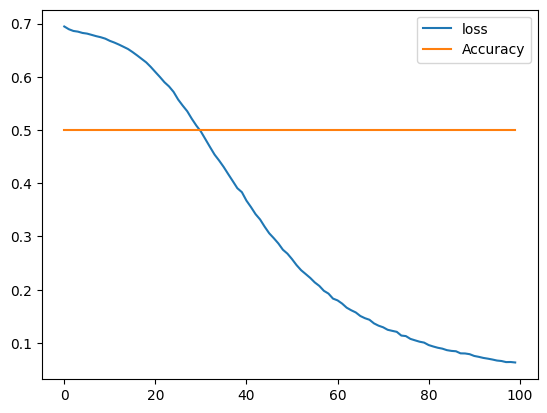

In [ ]:
pd.DataFrame(history.history).plot()

plt.show()


# conclusion:

# the accuracy seems to have remained flat through the whole training session. how to improve it?



# lets visualize how much the prediction is close to the actuality.

7/7 [==============================] - 0s 2ms/step


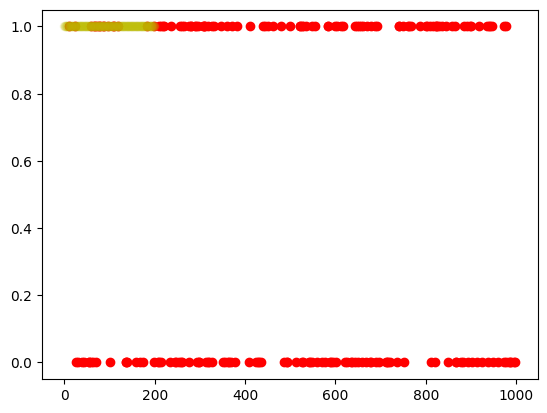

((200,), TensorShape([200]))

In [ ]:
actual = y_test

prediction = model.predict(x_test)
prediction = tf.squeeze(prediction)

plt.plot(actual,'ro')
plt.plot(prediction,'yo',alpha=0.1)

plt.show()

actual.shape,prediction.shape

# create a plot_boundary function

In [ ]:

def plot_boundary(df,model,x_train,x_test,y_train,y_test):

  # setting the axis boundaries for the mesh grid

  x0_min, x0_max = x_train['x0'].min() - 0.01, x_train['x0'].max() + 0.01
  x1_min, x1_max = x_train['x1'].min() - 0.01, x_train['x1'].max() + 0.01

  xx, yy = np.meshgrid(np.linspace(x0_min,x0_max,100),np.linspace(x1_min,x1_max,100))

  # flatten it
  x_in = np.c_[xx.ravel(),yy.ravel()]


  prediction = model.predict(x_in)


  # reshaping the prediction based off requirement

  if len(prediction[0]) > 1:

    print('We are doing multi-class classification')

    prediction = np.argmax(prediction,axis=1).reshape(xx.shape)

  else:

    print('We are doing Binary classification')

    prediction = np.round(prediction).reshape(xx.shape)


  # plot the decision boundary:
  plt.contourf(xx,yy,prediction,alpha=0.7,cmap=plt.cm.RdYlBu)
  plt.scatter(x=df['x0'],y=df['x1'],c=df['y'],cmap=plt.cm.RdYlBu,s=40)

  plt.xlim(x0_min,x0_max)
  plt.ylim(x1_min,x1_max)

  plt.show()

313/313 [==============================] - 0s 1ms/step
We are doing Binary classification


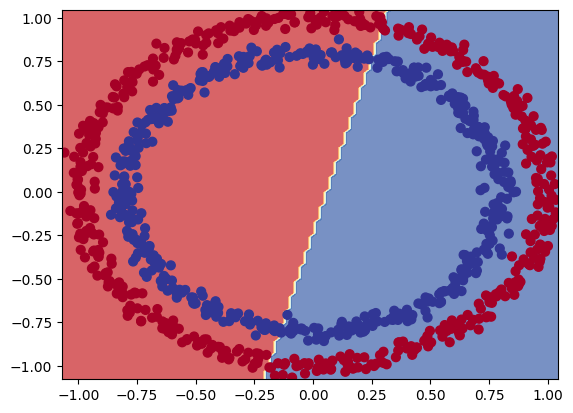

In [ ]:
plot_boundary(df,model,x_train,x_test,y_train,y_test)

# Experiment,analysis and freethrows

In [ ]:
xx.shape

(100, 100)

In [ ]:
yy.shape

(100, 100)

In [ ]:
np.c_[np.ravel(xx),np.ravel(yy)].shape

(10000, 2)

In [ ]:
a = np.random.randint(1,9,(3,3))

a

array([[1, 4, 6],
       [2, 8, 8],
       [3, 7, 4]])

In [ ]:
np.c_[a,a]

array([[1, 4, 6, 1, 4, 6],
       [2, 8, 8, 2, 8, 8],
       [3, 7, 4, 3, 7, 4]])

In [ ]:
np.ravel(a)

array([1, 4, 6, 2, 8, 8, 3, 7, 4])

In [ ]:
np.c_[np.ravel(a),np.ravel(a)]

array([[1, 1],
       [4, 4],
       [6, 6],
       [2, 2],
       [8, 8],
       [8, 8],
       [3, 3],
       [7, 7],
       [4, 4]])

In [ ]:
np.r_[np.ravel(a),np.ravel(a)]

array([1, 4, 6, 2, 8, 8, 3, 7, 4, 1, 4, 6, 2, 8, 8, 3, 7, 4])

In [ ]:
prediction

array([[0.99999994],
       [0.99999994],
       [0.99999994],
       ...,
       [0.99999994],
       [0.99999994],
       [0.99999994]], dtype=float32)

In [ ]:
len(prediction[0])

1

In [ ]:
np.argmax(prediction,axis=1)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.argmax(prediction,axis=1).shape

(10000,)

In [ ]:
xx.shape

(100, 100)

In [ ]:
np.argmax(prediction,axis=1).reshape(xx.shape)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
np.argmax(prediction,axis=1).reshape(xx.shape).shape

(100, 100)

In [ ]:
np.round(prediction)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
x_train

x0        x1
29   0.657946 -0.465081
535  0.631949 -0.734663
695 -1.008616 -0.124031
557 -0.966575 -0.225622
836 -0.166590  0.799446
..        ...       ...
106  0.612205  0.509429
270  0.988187 -0.156382
860  0.015745 -1.029985
435  1.011026  0.168028
102  0.557782 -0.570876

[800 rows x 2 columns]

In [ ]:
x_min,x_max,y_min,y_max

(-1.0695024599098635,
 1.0437117525463373,
 -1.0777683182718436,
 1.0460036756154805)

In [ ]:
x = np.linspace(1,10,10).reshape(2,5)

np.ravel(x)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
# working with regression data

x = np.linspace(1,10,1000)
y = np.linspace(12,15,1000)

# train_test_splitting
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


# model_building
model_regression = tf.keras.Sequential()
model_regression.add(tf.keras.layers.Dense(1))
model_regression.add(tf.keras.layers.Dense(10,activation='relu'))
model_regression.add(tf.keras.layers.Dense(40,activation='relu'))
model_regression.add(tf.keras.layers.Dense(1))

# compile the model
model_regression.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=[tf.keras.metrics.MeanSquaredError()])


# fit the model
model_regression.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100,verbose=False)

# evaluate the model
model_regression.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0055 - mean_squared_error: 3.1248e-05


[0.005483522545546293, 3.124815702904016e-05]

7/7 [==============================] - 0s 2ms/step


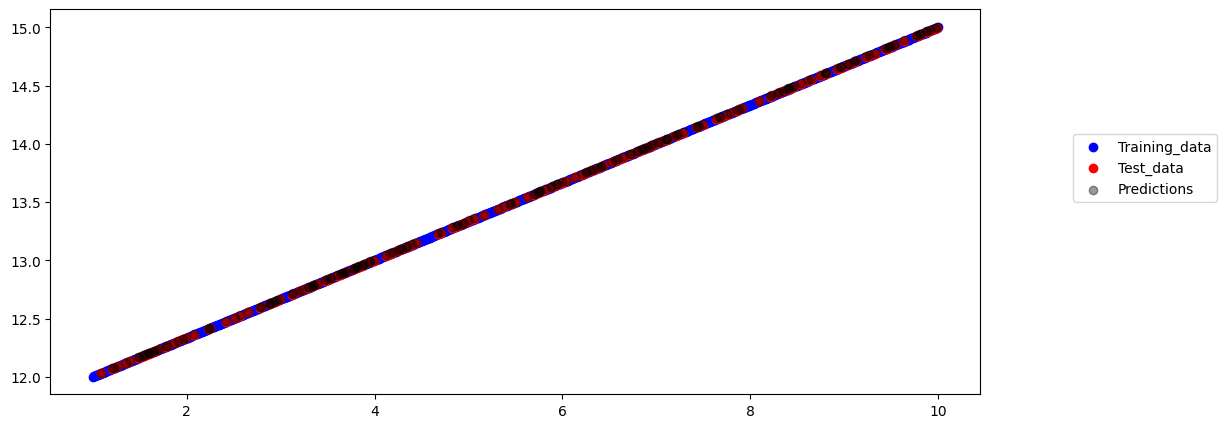

In [ ]:
prediction = model_regression.predict(x_test)


# plotting the data
plt.figure(figsize=(12,5))

plt.scatter(x_train,y_train,c='blue',label='Training_data')
plt.scatter(x_test,y_test,c='red',label='Test_data')
plt.scatter(x_test,prediction,c='black',label='Predictions',alpha=0.4)


plt.legend(loc=(1.1,0.5))

plt.show()

# experiment,analysis and freethrows

In [ ]:
x_train.shape

(800,)

In [ ]:
tf.expand_dims(x_train,axis=-1).shape

TensorShape([800, 1])